In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Customer Segmentation using kmeans

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

# Data Collection and analysis

In [24]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [25]:
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
customer_data.shape

(200, 5)

In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
# check missing value in data

In [29]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
# choose features for clustering 
# annual income
# spending score


In [31]:
X = customer_data.iloc[:,[3,4]].values  #[:,[3,4]] means whole row and index column 3 and 4 which are annual income , spending score

In [32]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [33]:
# find k value using wcss

In [34]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k  , init = "k-means++",random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)+


In [35]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

In [38]:
# plot elbow graph

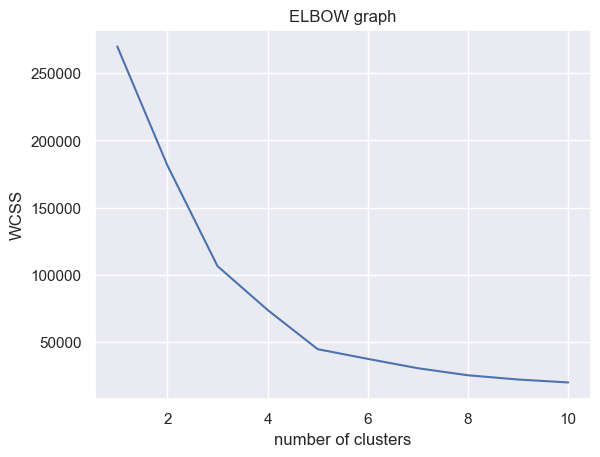

In [41]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("ELBOW graph")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# choose k =5 , bcz no such big drop 
# this was manaul method , we will go with knee locator

In [42]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve = "convex" , direction = "decreasing")

In [43]:
kl.elbow

5

In [44]:
# k = 5

# training the Kmeans Clustering Model

In [45]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++' , random_state = 0)

# return  label for each data point based on their clusters
Y = kmeans.fit_predict(X)

In [46]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
# Visualizing all the clusters

In [47]:
# plotting all clusters and their centroids 

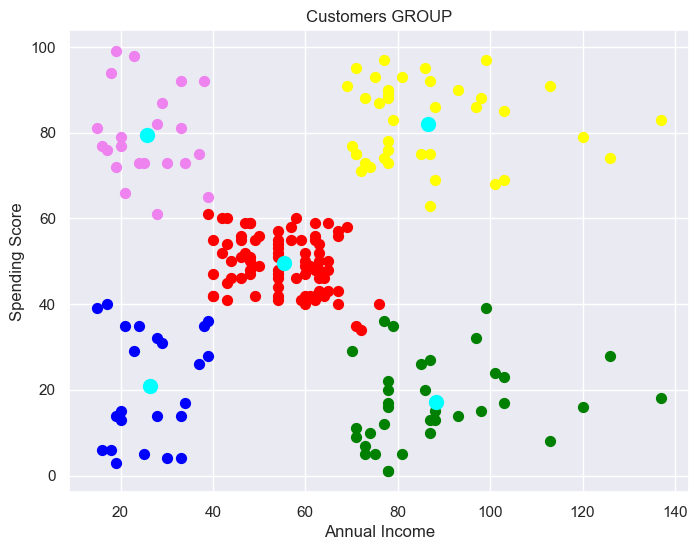

In [50]:
plt.figure(figsize = (8,6))
plt.scatter(X[Y == 0,0],X[Y == 0,1] , s = 50 , c = 'green' , label = "Cluster 1")
plt.scatter(X[Y == 1,0],X[Y == 1,1] , s = 50 , c = 'red' , label = "Cluster 2")
plt.scatter(X[Y == 2,0],X[Y == 2,1] , s = 50 , c = 'yellow' , label = "Cluster 3")
plt.scatter(X[Y == 3,0],X[Y == 3,1] , s = 50 , c = 'violet' , label = "Cluster 4")
plt.scatter(X[Y == 4,0],X[Y == 4,1] , s = 50 , c = 'blue' , label = "Cluster 5")

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c = 'cyan' , label = "Centroids")

# kmeans.cluster_centers_[:,0]  x axis
# kmeans.cluster_centers_[:,1] y axis

plt.title("Customers GROUP")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()